#  Casual Learning

Converting non-numerical values to numerical

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from haversine import haversine, Unit, haversine_vector
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import requests
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
from functools import partial
import os
from dotenv import load_dotenv
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import lnglat_to_meters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure import StructureModel
from sklearn.model_selection import train_test_split
import networkx as nx


In [2]:
# Path to the CSV file
file_path = '/home/moraa/Documents/10_academy/Week-8/artifacts/df_merged.csv'

# Load the CSV file into a DataFrame
df_merged = pd.read_csv(file_path)

# Display the first few rows of the loaded DataFrame to verify
print(df_merged.head())

   id  Trip ID  driver_id driver_action       lat       lng  \
0  17   392005     171165      rejected  0.467252 -0.165609   
1  18   392005     243172      rejected  0.573114  0.332253   
2  19   392005     244078      rejected  0.686601 -0.144470   
3  21   392005     243392      rejected  0.502039 -0.232383   
4  23   392005     171165      rejected  0.467252 -0.165609   

                   Trip Origin             Trip Destination  \
0  6.565087699999999,3.3844415  6.499696300000001,3.3509075   
1  6.565087699999999,3.3844415  6.499696300000001,3.3509075   
2  6.565087699999999,3.3844415  6.499696300000001,3.3509075   
3  6.565087699999999,3.3844415  6.499696300000001,3.3509075   
4  6.565087699999999,3.3844415  6.499696300000001,3.3509075   

       Trip Start Time        Trip End Time  ... Trip Duration Category  \
0  2021-07-01 10:53:36  2021-07-01 11:27:51  ...                  Short   
1  2021-07-01 10:53:36  2021-07-01 11:27:51  ...                  Short   
2  2021-07-01 10:

Compute clusters of delivery starting locations and destinations and plot how they are distributed in the city.

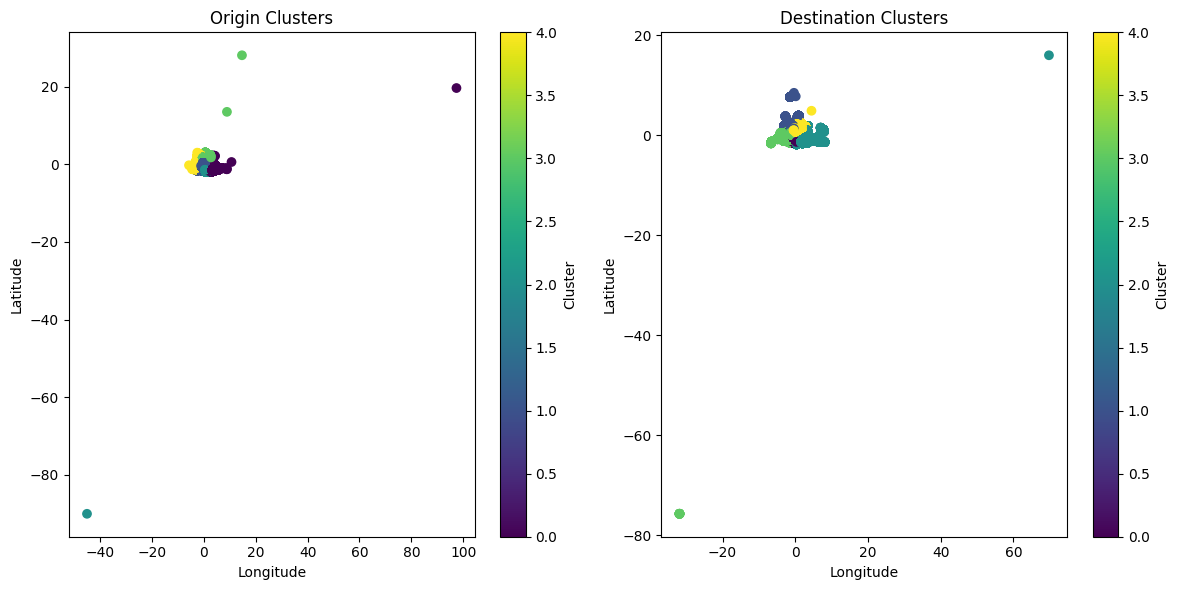

In [3]:
# Extract scaled origin and destination locations
origin_locations_scaled = df_merged[['Origin Lat', 'Origin Lng']].values
destination_locations_scaled = df_merged[['Destination Lat', 'Destination Lng']].values

# Choose the number of clusters
n_clusters = 5  # Adjust as needed

# Cluster the origin locations
kmeans_origin = KMeans(n_clusters=n_clusters, random_state=42)
origin_clusters = kmeans_origin.fit_predict(origin_locations_scaled)

# Cluster the destination locations
kmeans_destination = KMeans(n_clusters=n_clusters, random_state=42)
destination_clusters = kmeans_destination.fit_predict(destination_locations_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 6))

# Plot origin clusters
plt.subplot(1, 2, 1)
plt.scatter(df_merged['Origin Lng'], df_merged['Origin Lat'], c=origin_clusters, cmap='viridis')
plt.title('Origin Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

# Plot destination clusters
plt.subplot(1, 2, 2)
plt.scatter(df_merged['Destination Lng'], df_merged['Destination Lat'], c=destination_clusters, cmap='viridis')
plt.title('Destination Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()


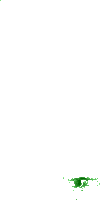

In [4]:
import datashader.transfer_functions as tf
import datashader as ds

# Set the resolution of the plot
plot_width, plot_height = 100, 200

# Downsample the data by selecting a subset
subset_df = df_merged.sample(frac=0.1)  # Adjust the fraction as needed

# Create the canvas
cvs_origin = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
cvs_destination = ds.Canvas(plot_width=plot_width, plot_height=plot_height)

# Aggregate the data into larger bins
agg_origin = cvs_origin.points(subset_df, 'lng', 'lat')
agg_destination = cvs_destination.points(subset_df, 'Destination Lng', 'Destination Lat')

# Shade the aggregated data
img_origin = tf.shade(agg_origin, cmap=['lightblue', 'darkblue'], how='log')
img_destination = tf.shade(agg_destination, cmap=['lightgreen', 'darkgreen'], how='log')

# Display the plots
img_origin + img_destination

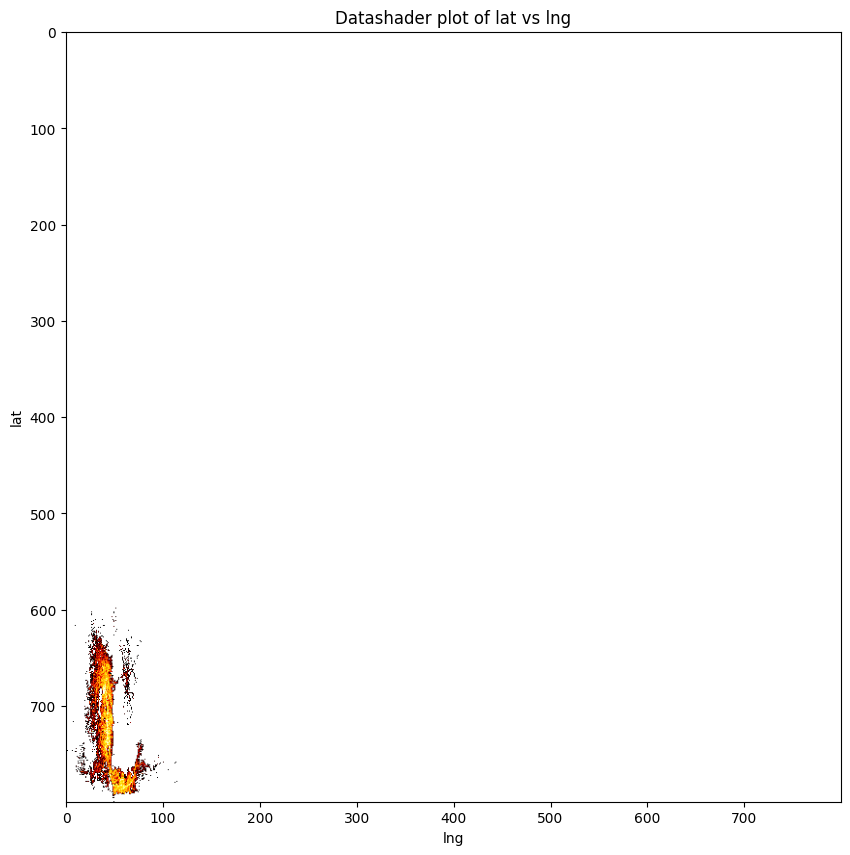

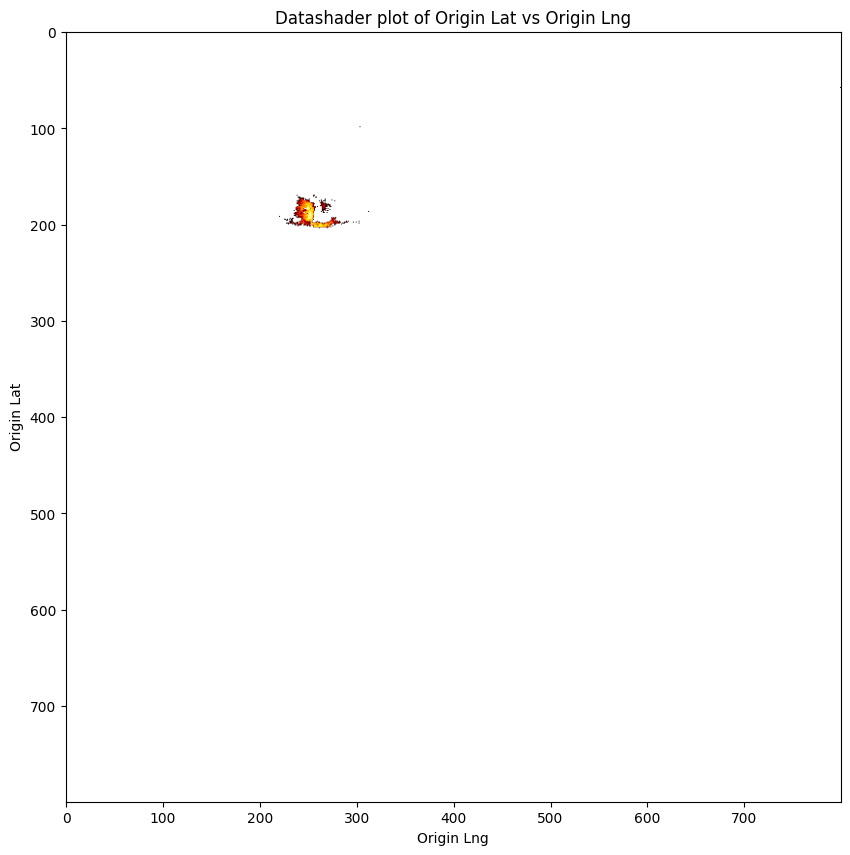

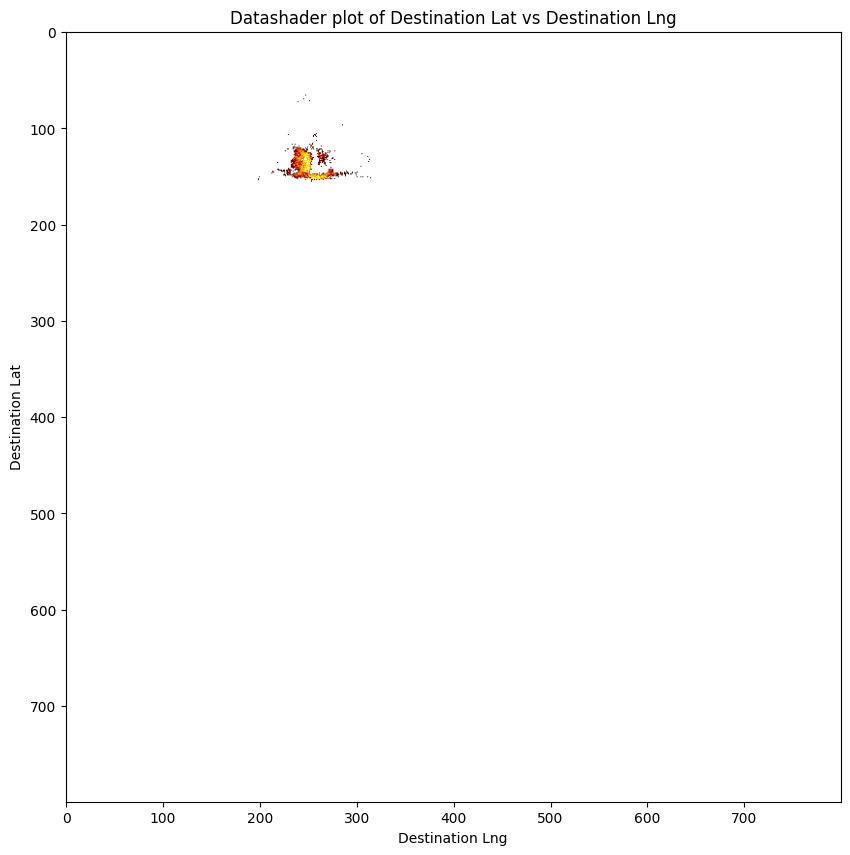

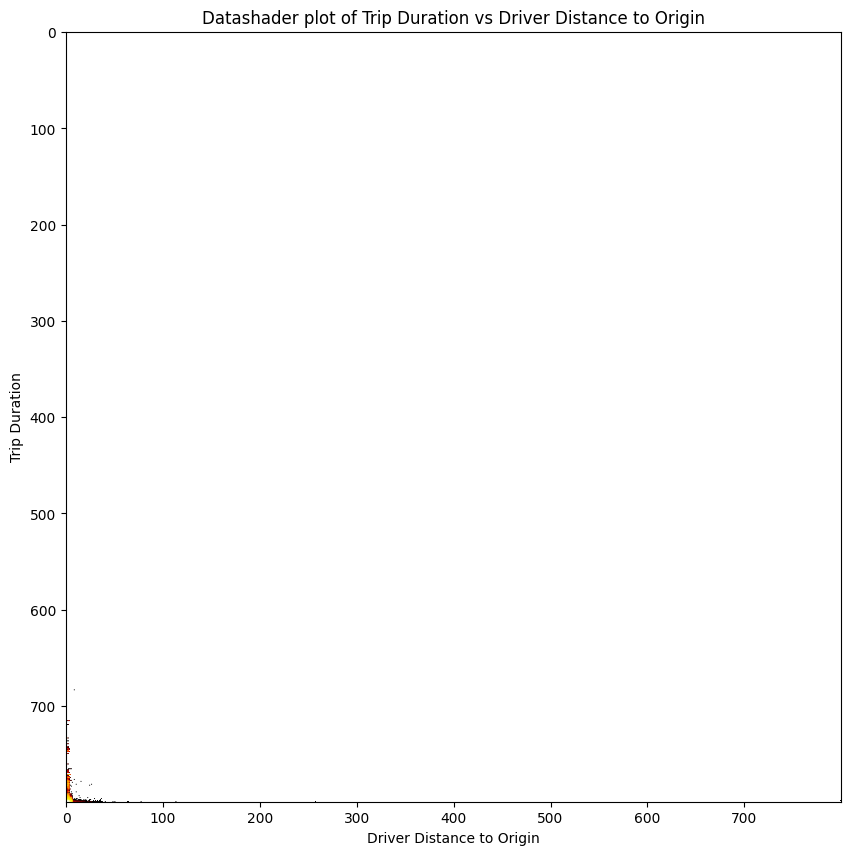

In [5]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import colorcet as cc
import matplotlib.pyplot as plt

# Define the columns you are interested in
columns_to_plot = [
    ('lng', 'lat'),
    ('Origin Lng', 'Origin Lat'),
    ('Destination Lng', 'Destination Lat'),
    ('Driver Distance to Origin', 'Trip Duration')
]

for x_col, y_col in columns_to_plot:
    # Create a Canvas
    canvas = ds.Canvas(plot_width=800, plot_height=800)

    # Aggregate data
    agg = canvas.points(df_merged, x_col, y_col)

    # Shade the aggregated data
    img = tf.shade(agg, cmap=cc.fire)

    # Display the image using matplotlib
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img.to_pil(), aspect='auto')
    ax.set_title(f'Datashader plot of {y_col} vs {x_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    plt.show()